In [4]:
from datasets import *
from train import *
from predict import *
from evaluate import *
from util import *
import numpy as np

# Test monthly stuff from thesis

## Create datasets:

All months:

In [5]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

In [ ]:
create_monthly_dataset(description, base_folder, output_folder)

loading variables
writing pickle


All months, use lagged months in predictions:

In [ ]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0,-1]).tolist()

In [ ]:
create_monthly_dataset(description, base_folder, output_folder)

Individual dataset for each month:

In [ ]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

for i in range(12):
    description["MONTHS_USED"] = np.sort([i]).tolist()
    create_monthly_dataset(description, base_folder, output_folder)

# Run experiments on these datasets:

All months.

In [7]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 5e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [8]:
n_runs = 3
for i in range(n_runs):
    model_training_description["RUN_NR"] = i
    unet = train_unet(description, model_training_description, output_folder)
    predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

Starting training
Epoch [1], Iter [1201/1211] Loss: 0.3242
Epoch [2], Iter [1201/1211] Loss: 0.3027
Epoch [3], Iter [1201/1211] Loss: 0.3022
Epoch [4], Iter [1201/1211] Loss: 0.2847
Epoch [5], Iter [1201/1211] Loss: 0.2718
Epoch [6], Iter [1201/1211] Loss: 0.3039
Epoch [7], Iter [1201/1211] Loss: 0.2464
Epoch [8], Iter [1201/1211] Loss: 0.2620
Epoch [9], Iter [1201/1211] Loss: 0.2634
Epoch [10], Iter [1201/1211] Loss: 0.2760
Epoch [11], Iter [1201/1211] Loss: 0.2538
Epoch [12], Iter [1201/1211] Loss: 0.2457
Epoch [13], Iter [1201/1211] Loss: 0.2620
Epoch [14], Iter [1201/1211] Loss: 0.2446
Epoch [15], Iter [1201/1211] Loss: 0.2445
Epoch [16], Iter [1201/1211] Loss: 0.2255
Epoch [17], Iter [1201/1211] Loss: 0.2650
Epoch [18], Iter [1201/1211] Loss: 0.2469
Epoch [19], Iter [1201/1211] Loss: 0.2530
Epoch [20], Iter [1201/1211] Loss: 0.2693
Epoch [21], Iter [1201/1211] Loss: 0.2357
Epoch [22], Iter [1201/1211] Loss: 0.2458
Epoch [23], Iter [1201/1211] Loss: 0.2771
Epoch [24], Iter [1201/12

All months, use previous timestep in prediction

In [2]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf",
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False


description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0,-1]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise","Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 5e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))*2
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [3]:
n_runs = 3
for i in range(n_runs):
    model_training_description["RUN_NR"] = i
    unet = train_unet(description, model_training_description, output_folder)
    predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

Starting training
Epoch [1], Iter [1201/1210] Loss: 0.3701
Epoch [2], Iter [1201/1210] Loss: 0.3048
Epoch [3], Iter [1201/1210] Loss: 0.2898
Epoch [4], Iter [1201/1210] Loss: 0.3137
Epoch [5], Iter [1201/1210] Loss: 0.2678
Epoch [6], Iter [1201/1210] Loss: 0.2941
Epoch [7], Iter [1201/1210] Loss: 0.2587
Epoch [8], Iter [1201/1210] Loss: 0.2814
Epoch [9], Iter [1201/1210] Loss: 0.2382
Epoch [10], Iter [1201/1210] Loss: 0.2431
Epoch [11], Iter [1201/1210] Loss: 0.2614
Epoch [12], Iter [1201/1210] Loss: 0.2487
Epoch [13], Iter [1201/1210] Loss: 0.2420
Epoch [14], Iter [1201/1210] Loss: 0.2562
Epoch [15], Iter [1201/1210] Loss: 0.2419
Epoch [16], Iter [1201/1210] Loss: 0.2492
Epoch [17], Iter [1201/1210] Loss: 0.2652
Epoch [18], Iter [1201/1210] Loss: 0.2396
Epoch [19], Iter [1201/1210] Loss: 0.2464
Epoch [20], Iter [1201/1210] Loss: 0.2658
Epoch [21], Iter [1201/1210] Loss: 0.2617
Epoch [22], Iter [1201/1210] Loss: 0.2403
Epoch [23], Iter [1201/1210] Loss: 0.2486
Epoch [24], Iter [1201/12

Individual models for different cases:

In [4]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf",
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False


description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 5e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [5]:
n_runs = 3
for j in range(n_runs):
    model_training_description["RUN_NR"] = j
    for i in range(12):
        description["MONTHS_USED"] = np.sort([i]).tolist()
        unet = train_unet(description, model_training_description, output_folder)
        predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

Starting training
Epoch [1], Iter [91/101] Loss: 0.6997
Epoch [2], Iter [91/101] Loss: 0.5886
Epoch [3], Iter [91/101] Loss: 0.6248
Epoch [4], Iter [91/101] Loss: 0.5791
Epoch [5], Iter [91/101] Loss: 0.5282
Epoch [6], Iter [91/101] Loss: 0.5808
Epoch [7], Iter [91/101] Loss: 0.5097
Epoch [8], Iter [91/101] Loss: 0.4942
Epoch [9], Iter [91/101] Loss: 0.5140
Epoch [10], Iter [91/101] Loss: 0.4823
Epoch [11], Iter [91/101] Loss: 0.4941
Epoch [12], Iter [91/101] Loss: 0.4951
Epoch [13], Iter [91/101] Loss: 0.4570
Epoch [14], Iter [91/101] Loss: 0.4812
Epoch [15], Iter [91/101] Loss: 0.4548
Epoch [16], Iter [91/101] Loss: 0.4274
Epoch [17], Iter [91/101] Loss: 0.4572
Epoch [18], Iter [91/101] Loss: 0.4336
Epoch [19], Iter [91/101] Loss: 0.4649
Epoch [20], Iter [91/101] Loss: 0.4346
Epoch [21], Iter [91/101] Loss: 0.4086
Epoch [22], Iter [91/101] Loss: 0.4095
Epoch [23], Iter [91/101] Loss: 0.3947
Epoch [24], Iter [91/101] Loss: 0.3943
Test MSE: 0.5084053874015808
writing predictions
writin

Epoch [10], Iter [91/100] Loss: 0.5090
Epoch [11], Iter [91/100] Loss: 0.4735
Epoch [12], Iter [91/100] Loss: 0.5196
Epoch [13], Iter [91/100] Loss: 0.4999
Epoch [14], Iter [91/100] Loss: 0.4843
Epoch [15], Iter [91/100] Loss: 0.5597
Epoch [16], Iter [91/100] Loss: 0.4795
Epoch [17], Iter [91/100] Loss: 0.4406
Epoch [18], Iter [91/100] Loss: 0.4414
Epoch [19], Iter [91/100] Loss: 0.4305
Epoch [20], Iter [91/100] Loss: 0.4266
Epoch [21], Iter [91/100] Loss: 0.4237
Epoch [22], Iter [91/100] Loss: 0.4118
Test MSE: 0.6449451446533203
writing predictions
writing descriptions
done
Starting training
Epoch [1], Iter [91/100] Loss: 0.7141
Epoch [2], Iter [91/100] Loss: 0.6192
Epoch [3], Iter [91/100] Loss: 0.6048
Epoch [4], Iter [91/100] Loss: 0.6183
Epoch [5], Iter [91/100] Loss: 0.5507
Epoch [6], Iter [91/100] Loss: 0.5391
Epoch [7], Iter [91/100] Loss: 0.5473
Epoch [8], Iter [91/100] Loss: 0.5369
Epoch [9], Iter [91/100] Loss: 0.5401
Epoch [10], Iter [91/100] Loss: 0.4608
Epoch [11], Iter [9

# Evaluate:

In [7]:
c_all = {
    "DATASET_DESCRIPTION": {'MONTHS_USED': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                            'MONTHS_USED_IN_PREDICTION': [0]},
    "MODEL_TRAINING_DESCRIPTION": {}
}

descriptions, predictions, gt, masks = load_data_for_comparison(output_folder, c_all)

c_all_use_p = {
    "DATASET_DESCRIPTION": {'MONTHS_USED': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                            'MONTHS_USED_IN_PREDICTION': [-1, 0]},
    "MODEL_TRAINING_DESCRIPTION": {}
}

descriptions_p, predictions_p, gt_p, masks_p = load_data_for_comparison(output_folder, c_all_use_p)

3 matching runs found
3 matching runs found


In [39]:
r2_single = []

for i in range(12):
    r2_single.append([])
    c_single = {
        "DATASET_DESCRIPTION": {'MONTHS_USED': [i],
                                'MONTHS_USED_IN_PREDICTION': [0]},
        "MODEL_TRAINING_DESCRIPTION": {}
    }
    descriptions_s, predictions_s, gt_s, masks_s = load_data_for_comparison(output_folder, c_single)
    for j in range(3):
        r2 = get_r2(predictions_s[j][i], gt_s[j][i], masks_s[j][i])
        r2_single[-1].append(get_weighted_average(r2, descriptions[j]["DATASET_DESCRIPTION"])[0])
        
r2_single = np.mean(np.array(r2_single),axis=1)

3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found
3 matching runs found


In [29]:
r2_all = []
r2_all_use_p = []

for j in range(3):
    r2_all.append([])
    r2_all_use_p.append([])
    for i in range(12):
        r2 = get_r2(predictions[j][i], gt[j][i], masks[j][i])
        r2_p = get_r2(predictions_p[j][i], gt_p[j][i], masks_p[j][i])
        r2_all[-1].append(get_weighted_average(r2, descriptions[j]["DATASET_DESCRIPTION"])[0])
        r2_all_use_p[-1].append(get_weighted_average(r2_p, descriptions_p[j]["DATASET_DESCRIPTION"])[0])
        
r2_all = np.mean(np.array(r2_all),axis=0)
r2_all_use_p = np.mean(np.array(r2_all_use_p),axis=0)

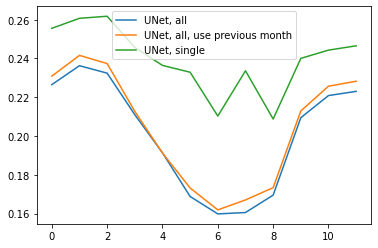

In [42]:
import matplotlib.pyplot as plt

plt.plot(r2_all, label="UNet, all")
plt.plot(r2_all_use_p, label="UNet, all, use previous month")
plt.plot(r2_single, label="UNet, single")
plt.legend()